In [2]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
plt.style.use('seaborn-bright')
from pmdarima.arima import auto_arima
import time
from sklearn import linear_model


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## MLR

In [172]:
df = pd.read_csv('serie_temporal_interpolada.csv', sep = ',',header=0, parse_dates=[0], index_col=0, squeeze=True)
df.index = df.index.to_period("H")
df_0 = df[df['conf_lvl']==0]
intensity_list = df_0["intensity"].tolist()
index= df_0.index.values
s_0 = pd.Series(intensity_list, index=index)
ts_0=s_0

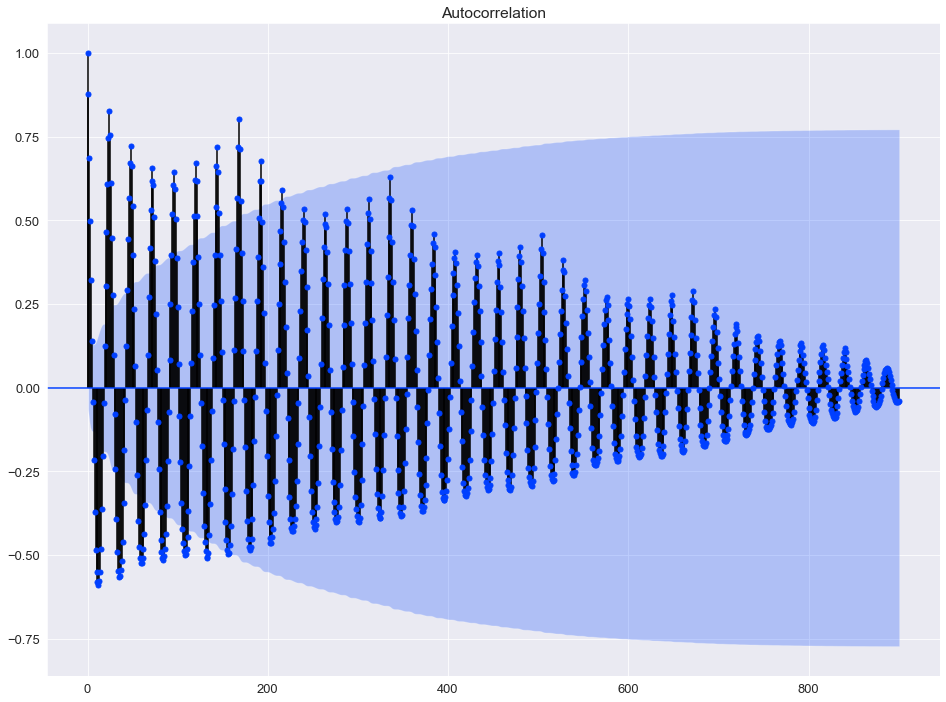

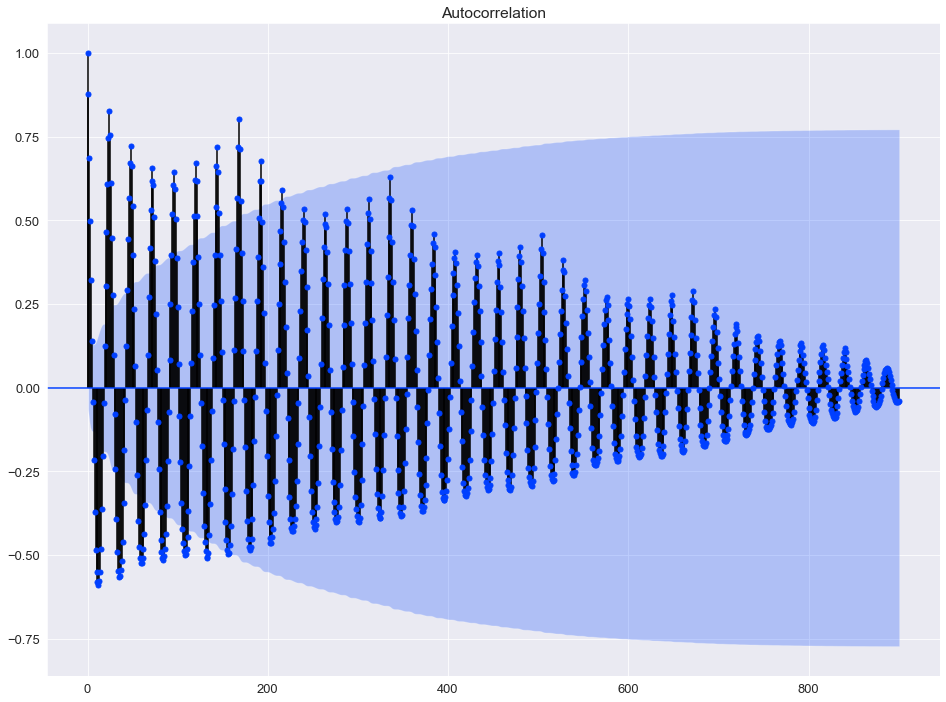

In [173]:
sm.graphics.tsa.plot_acf(ts_0.values,lags=900)

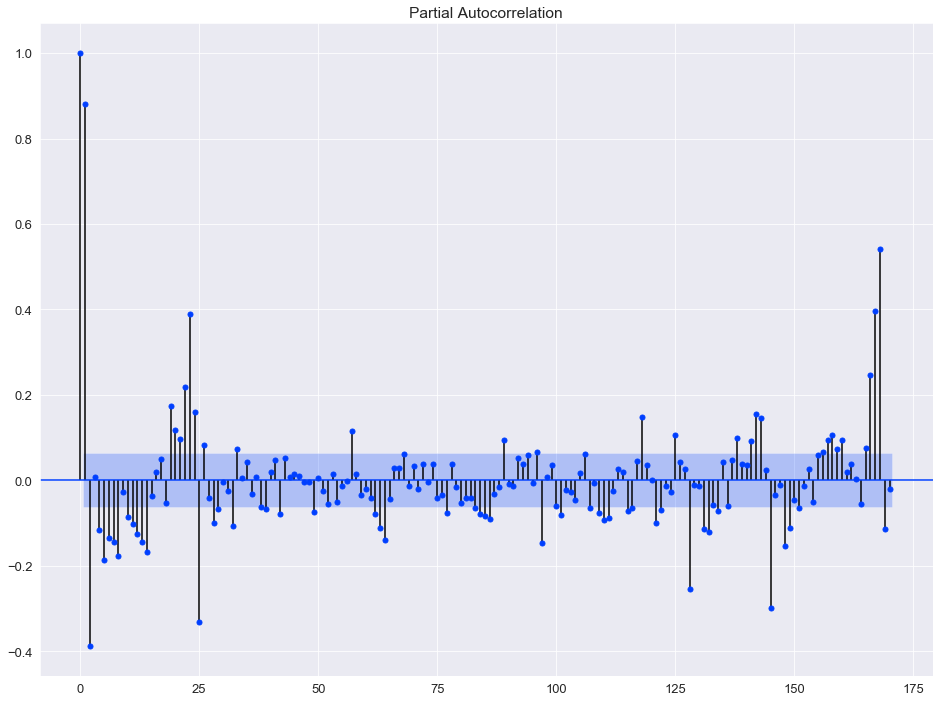

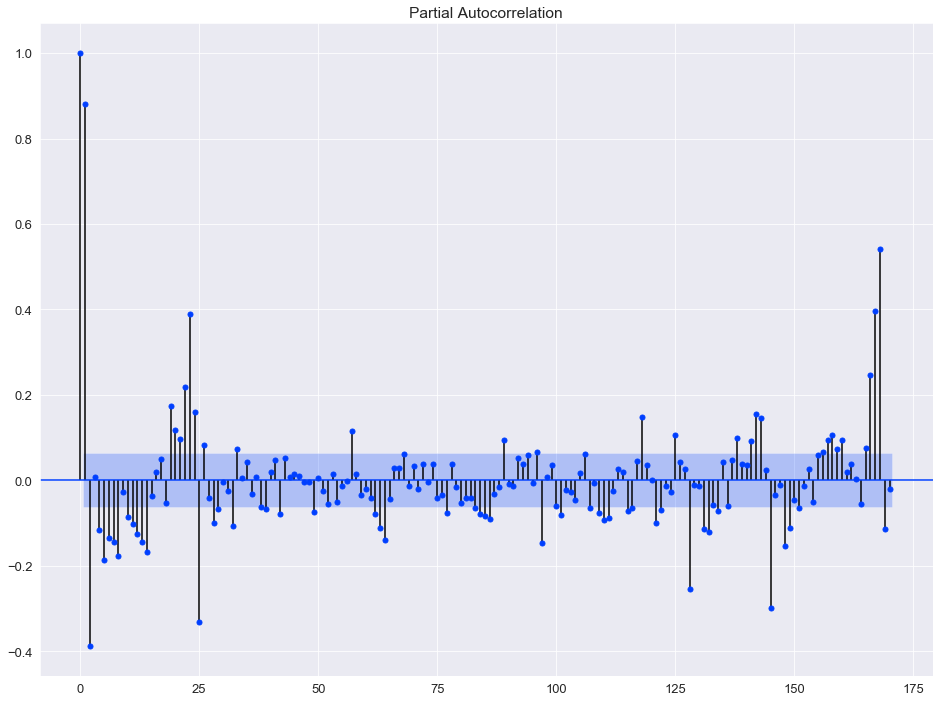

In [174]:
sm.graphics.tsa.plot_pacf(ts_0.values,lags=170)

In [175]:
train = ts_0.loc['2020-02-01 00:00:00':'2020-03-04 23:00:00']
test = ts_0.loc['2020-03-05 00:00:00':]


In [176]:
train

2020-02-01 00:00    1495.75
2020-02-01 01:00    1157.75
2020-02-01 02:00     769.00
2020-02-01 03:00     575.25
2020-02-01 04:00     463.00
                     ...   
2020-03-04 19:00    3013.00
2020-03-04 20:00    4044.25
2020-03-04 21:00    3798.50
2020-03-04 22:00    2604.50
2020-03-04 23:00    1514.25
Freq: H, Length: 792, dtype: float64

In [177]:
test

2020-03-05 00:00     984.25
2020-03-05 01:00     458.75
2020-03-05 02:00     235.50
2020-03-05 03:00     199.75
2020-03-05 04:00     190.50
                     ...   
2020-03-11 19:00    4225.00
2020-03-11 20:00    4935.25
2020-03-11 21:00    3649.00
2020-03-11 22:00    1944.50
2020-03-11 23:00    1147.25
Freq: H, Length: 168, dtype: float64

In [178]:
values_t0= pd.DataFrame(train.values)


In [179]:
dataframe = pd.concat([values_t0,values_t0.shift(1),values_t0.shift(2),values_t0.shift(3),
                      values_t0.shift(24),values_t0.shift(168)],axis=1)
dataframe.columns = ['t','t-1', 't-2','t-3','t-24','t-168']

In [180]:
dataframe

,t,t-1,t-2,t-3,t-24,t-168
0,1495.75,NaN,NaN,NaN,NaN,NaN
1,1157.75,1495.75,NaN,NaN,NaN,NaN
2,769.00,1157.75,1495.75,NaN,NaN,NaN
3,575.25,769.00,1157.75,1495.75,NaN,NaN
4,463.00,575.25,769.00,1157.75,NaN,NaN
...,...,...,...,...,...,...
787,3013.00,2588.00,2981.25,3798.75,2521.00,3393.00
788,4044.25,3013.00,2588.00,2981.25,3608.25,4439.75
789,3798.50,4044.25,3013.00,2588.00,3596.25,3648.75
790,2604.50,3798.50,4044.25,3013.00,2463.50,2215.25


In [181]:
XY=dataframe[168:]

In [182]:
XY

,t,t-1,t-2,t-3,t-24,t-168
168,1546.75,1809.50,2762.75,3857.00,1158.00,1495.75
169,1154.00,1546.75,1809.50,2762.75,625.25,1157.75
170,763.25,1154.00,1546.75,1809.50,325.00,769.00
171,594.25,763.25,1154.00,1546.75,273.75,575.25
172,473.50,594.25,763.25,1154.00,271.50,463.00
...,...,...,...,...,...,...
787,3013.00,2588.00,2981.25,3798.75,2521.00,3393.00
788,4044.25,3013.00,2588.00,2981.25,3608.25,4439.75
789,3798.50,4044.25,3013.00,2588.00,3596.25,3648.75
790,2604.50,3798.50,4044.25,3013.00,2463.50,2215.25


In [183]:
X=XY[['t-1','t-2','t-3','t-24','t-168']]

In [184]:
X

,t-1,t-2,t-3,t-24,t-168
168,1809.50,2762.75,3857.00,1158.00,1495.75
169,1546.75,1809.50,2762.75,625.25,1157.75
170,1154.00,1546.75,1809.50,325.00,769.00
171,763.25,1154.00,1546.75,273.75,575.25
172,594.25,763.25,1154.00,271.50,463.00
...,...,...,...,...,...
787,2588.00,2981.25,3798.75,2521.00,3393.00
788,3013.00,2588.00,2981.25,3608.25,4439.75
789,4044.25,3013.00,2588.00,3596.25,3648.75
790,3798.50,4044.25,3013.00,2463.50,2215.25


In [185]:
Y=XY['t']

In [188]:
mlr=linear_model.LinearRegression()
mlr_r = mlr.fit(X,Y)

In [16]:
print('Intercept: \n', mlr.intercept_)
print('Coefficients: \n', mlr.coef_)

Intercept: 
 43.99455396467329
Coefficients: 
 [ 0.23373785 -0.10342594  0.00859545  0.05914963  0.78704964]


In [112]:
predictions = []
y = Y.copy()
for n in range(0,168):
    t_1= y.tail(1).values[0]
    t_2=y.tail(2).values[0]
    t_3=y.tail(3).values[0]
    t_24=y.tail(24).values[0]
    t_168=y.tail(168).values[0]
    x =pd.DataFrame(np.array([[t_1,t_2,t_3,t_24,t_168]]),
                   columns=['t-1', 't-2','t-3','t-24','t-168'])
    pred = mlr.predict(x)
    y=y.append(pd.Series([pred[0]]), ignore_index=True)
    predictions.append(pred)

In [113]:
len(predictions)

168

In [114]:
test

timestamp
2020-03-05 00:00     984.25
2020-03-05 01:00     458.75
2020-03-05 02:00     235.50
2020-03-05 03:00     199.75
2020-03-05 04:00     190.50
                     ...   
2020-03-11 19:00    4225.00
2020-03-11 20:00    4935.25
2020-03-11 21:00    3649.00
2020-03-11 22:00    1944.50
2020-03-11 23:00    1147.25
Freq: H, Name: intensity, Length: 168, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


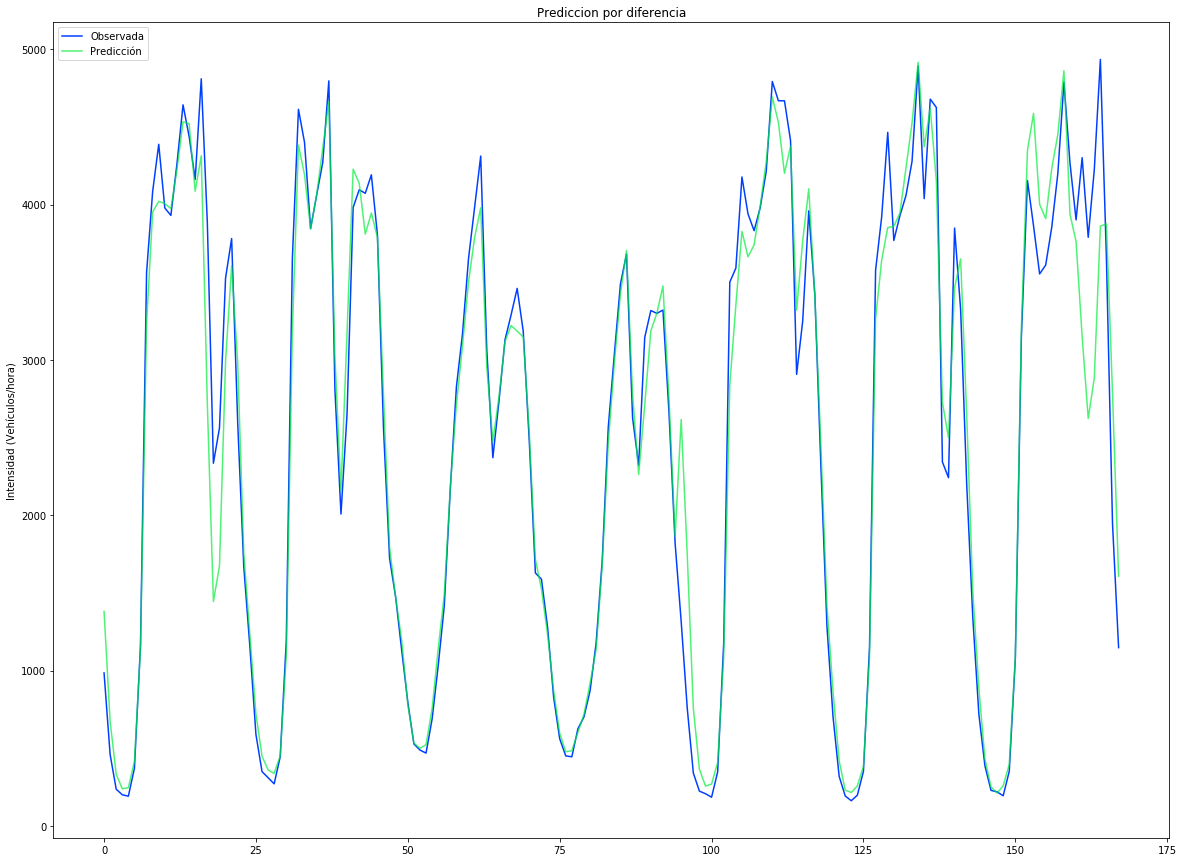

In [122]:
f, ax2 = plt.subplots(figsize=(20,15))

ax2.set_ylabel('Intensidad (Vehículos/hora)')
ax2.set_title('Prediccion por diferencia')
ax2.plot(test.values,label='Observada')
ax2.plot(predictions,label='Predicción',alpha=.7)
ax2.legend()

f.show()

In [ ]:
mse = ((test.values - predictions) ** 2).mean()
print('MLR MSE: {}'.format(round(mse, 2)))

## SARIMA

### SARIMAX168 simple

In [259]:
m_168=sm.tsa.statespace.SARIMAX(train,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 1, 168),
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [260]:
m_168.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  792
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 168)   Log Likelihood               -5885.678
Date:                             Fri, 12 Jun 2020   AIC                          11781.356
Time:                                     03:55:25   BIC                          11801.947
Sample:                                 02-01-2020   HQIC                         11789.469
                                      - 03-04-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3428   3.76e-26   9.12e+24      0.000       0.343       0.343
ma.L1          0.0460   3.86e-26   1.19e+24      0.000       0.046       0.046
ar.S.L168     -0.6656   5.73e-26  -1.16e+25      0.000      -0.666      -0.666
ma.S.L168  -2.369e+12   7.13e-32  -3.32e+43      0.000   -2.37e+12   -2.37e+12
sigma2      5.165e-15    8.9e-11    5.8e-05      1.000   -1.75e-10    1.75e-10
===================================================================================
Ljung-Box (Q):                       49.99   Jarque-Bera (JB):              2083.57
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                            -0.38
Prob(H) (two-sided):                  0.86   Kurtosis:                        13.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.28e+58. Standard errors may be unstable.
"""

In [261]:
pred= m_168.forecast(168)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


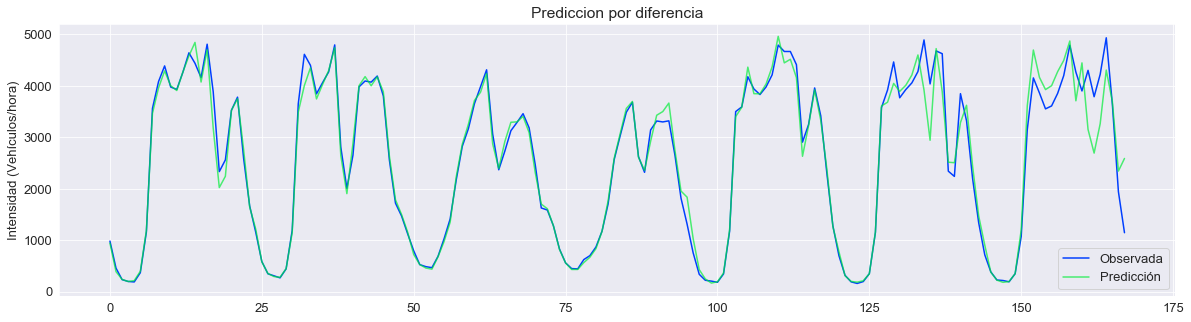

In [262]:
f, (ax2) = plt.subplots(figsize=(20,5))

ax2.set_ylabel('Intensidad (Vehículos/hora)')
ax2.set_title('Prediccion por diferencia')
ax2.plot(test.values,label='Observada')
ax2.plot(pred.values,label='Predicción',alpha=.7)
ax2.legend()


f.show()

### SARIMAX24 con diferencias

In [202]:
diff_se = train.diff(periods=168)

In [203]:
m_diff_24 = auto_arima(y=train,m=24,suppress_warnings=True)

In [204]:
m_diff_24.aic()

12142.490020083384

In [206]:
m_diff_24_r = m_diff_24.fit(diff_se)
m_diff_24_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  792
Model:             SARIMAX(1, 0, 4)x(2, 0, [1, 2], 24)   Log Likelihood               -4490.396
Date:                                 Thu, 11 Jun 2020   AIC                           9002.792
Time:                                         11:29:17   BIC                           9054.212
Sample:                                              0   HQIC                          9022.555
                                                 - 792                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.7379      8.644      0.317      0.751     -14.203      19.679
ar.L1          0.9104      0.283      3.214      0.001       0.355       1.466
ma.L1         -0.5417      0.283     -1.917      0.055      -1.095       0.012
ma.L2         -0.2486      0.120     -2.079      0.038      -0.483      -0.014
ma.L3         -0.0521      0.056     -0.928      0.353      -0.162       0.058
ma.L4         -0.0076      0.047     -0.163      0.870      -0.099       0.084
ar.S.L24       0.6219      0.059     10.582      0.000       0.507       0.737
ar.S.L48      -0.9763      0.054    -18.193      0.000      -1.081      -0.871
ma.S.L24      -0.6420      0.080     -8.054      0.000      -0.798      -0.486
ma.S.L48       0.9197      0.108      8.502      0.000       0.708       1.132
sigma2      1.114e+05   6123.926     18.189      0.000    9.94e+04    1.23e+05
===================================================================================
Ljung-Box (Q):                       93.19   Jarque-Bera (JB):              5906.42
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              10.51   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

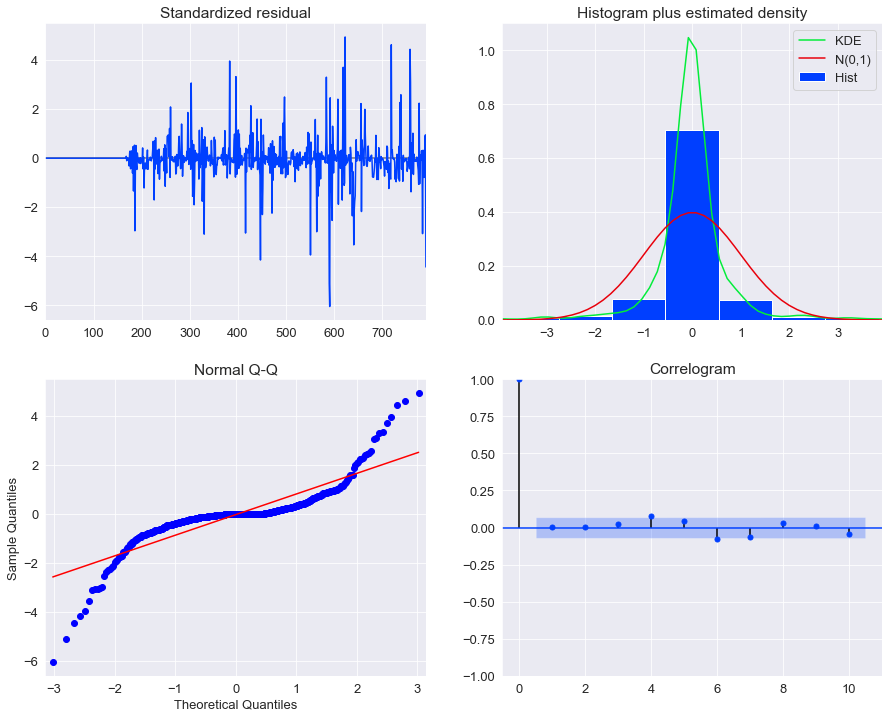

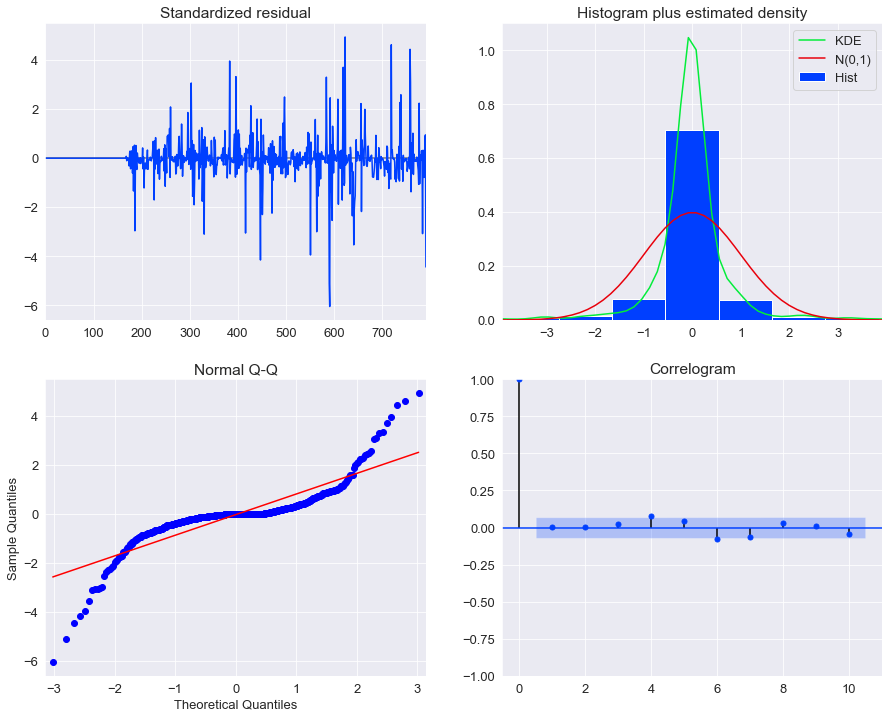

In [210]:
m_diff_24_r.plot_diagnostics(figsize=(15, 12))

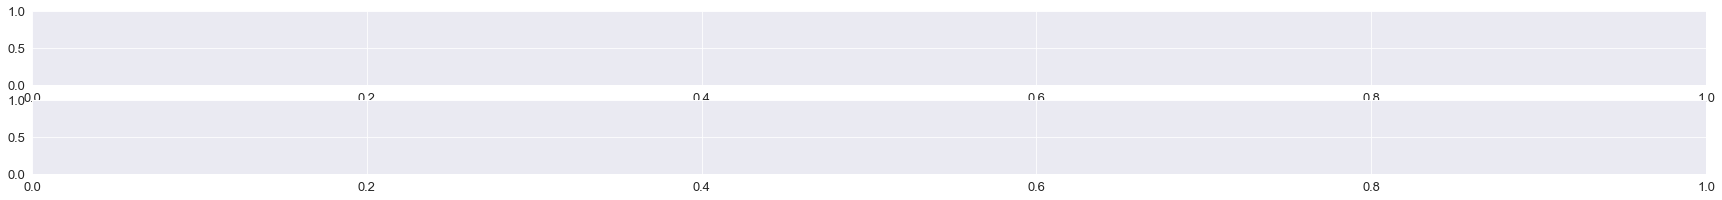

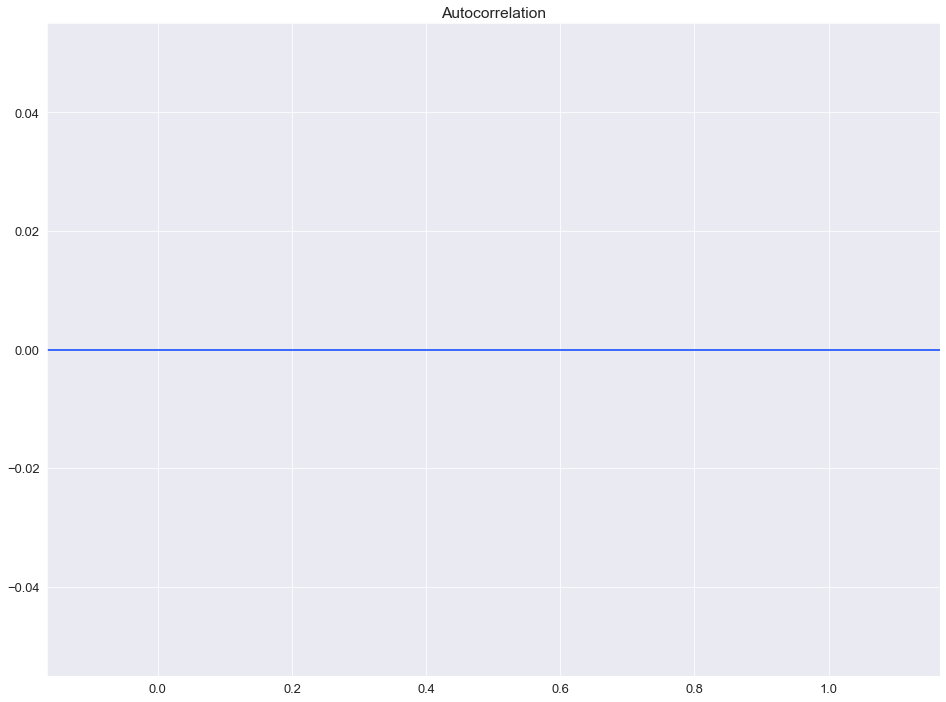

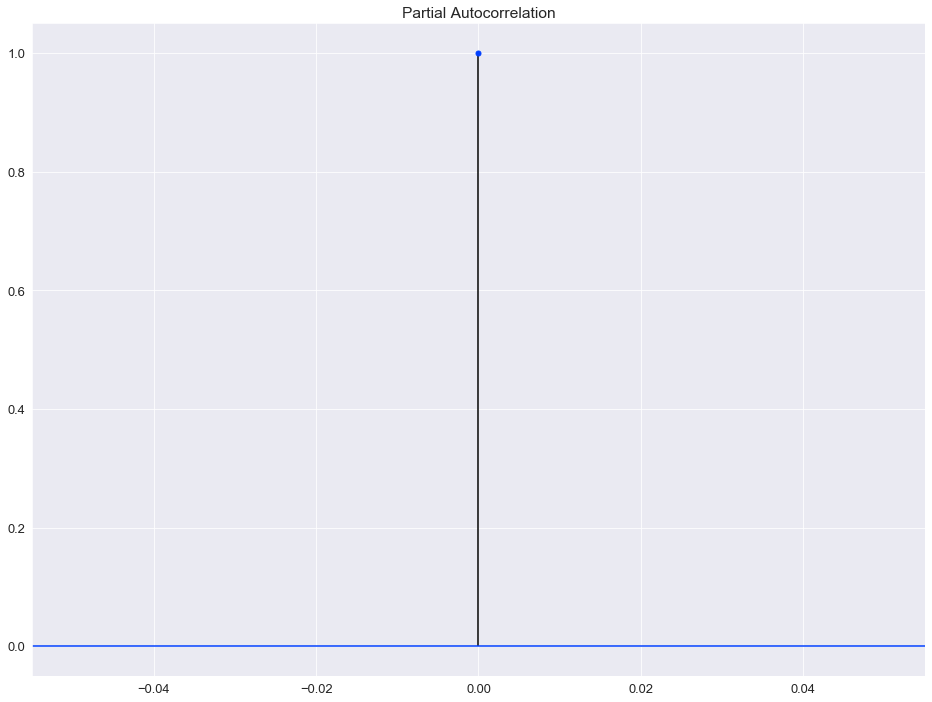

In [211]:
residuos_24 = m_diff_24_r.resid()
f, (ax1, ax2) = plt.subplots(2,1, figsize=(30,3))
ax1 = sm.graphics.tsa.plot_acf(residuos_24,lags=168)
ax2 = sm.graphics.tsa.plot_pacf(residuos_24,lags=168)
plt.show()

In [213]:
diff_pred_24 =m_diff_24_r.predict(n_periods=168)

In [214]:
t_24=train.tail(168)

In [215]:
res_pred_24 = t_24+diff_pred_24

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


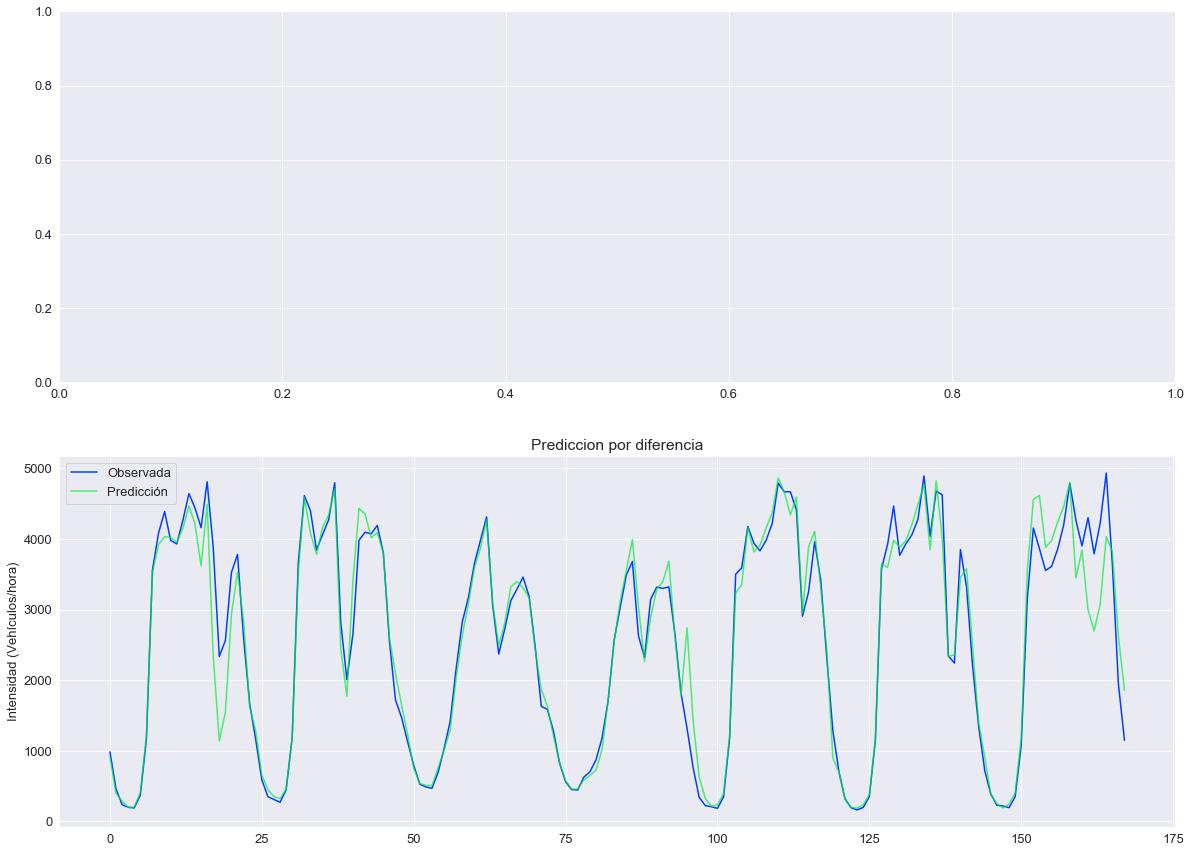

In [217]:
f, (ax1,ax2) = plt.subplots(2,1,figsize=(20,15))

ax2.set_ylabel('Intensidad (Vehículos/hora)')
ax2.set_title('Prediccion por diferencia')
ax2.plot(test.values,label='Observada')
ax2.plot(res_pred_24.values,label='Predicción',alpha=.7)
ax2.legend()


f.show()

### SARIMAX168 

*Este modelo no se computa*

In [218]:
diff_se = train.diff(periods=168)

In [222]:
#man_arima_168
m_diff_168=sm.tsa.statespace.SARIMAX(diff_se,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 1, 168),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

In [ ]:
try:
    m_diff_168_r = m_diff_168.fit(diff_se)
except Error as e:
    print(e)

In [ ]:
m_diff_168_2=sm.tsa.statespace.SARIMAX(train,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 168),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
m_diff_168_r_2 = m_diff_168_2.fit(diff_se)

In [ ]:
m_diff_168.plot_diagnostics(figsize=(15, 12))

In [ ]:
residuos_168 = m_diff_168.resid()
f, (ax1, ax2) = plt.subplots(2,1, figsize=(30,3))
ax1 = sm.graphics.tsa.plot_acf(residuos_168,lags=168)
ax2 = sm.graphics.tsa.plot_pacf(residuos_168,lags=168)
plt.show()

In [ ]:
diff_pred_168 =fitted_168.predict(steps=168)

In [ ]:
t_168=train.tail(168)

In [ ]:
res_pred_168 = t_168+diff_pred_168

In [ ]:
f, (ax1,ax2) = plt.subplots(2,1,figsize=(20,15))

ax2.set_ylabel('Intensidad (Vehículos/hora)')
ax2.set_title('Prediccion por diferencia')
ax2.plot(test.values,label='Observada')
ax2.plot(res_pred_168.values,label='Predicción',alpha=.7)
ax2.legend()


f.show()

## TBATS

In [124]:
from tbats import BATS, TBATS

In [126]:
tbats_predictor = TBATS(seasonal_periods=(24,168),use_arma_errors=False)
tabats_model = tbats_predictor.fit(train)
y_forecast = tabats_model.forecast(steps=168)

In [129]:
print(tabats_model.summary())

Use Box-Cox: True
Use trend: True
Use damped trend: True
Seasonal periods: [ 24. 168.]
Seasonal harmonics [11  6]
ARMA errors (p, q): (0, 0)
Box-Cox Lambda 0.246706
Smoothing (Alpha): 1.401654
Trend (Beta): -0.342498
Damping Parameter (Phi): 0.811213
Seasonal Parameters (Gamma): [-4.69402029e-07  4.25803877e-07 -2.15765259e-07  2.00396058e-07]
AR coefficients []
MA coefficients []
Seed vector [ 2.54286742e+01 -6.71836581e-01 -4.94757783e+00  4.61451815e-01
  6.22832510e-01 -1.10967666e-01 -4.43751863e-01  1.57199097e-01
  4.91362276e-01 -6.06654255e-02 -8.64898513e-02  1.16196100e-01
  4.54374829e-02 -4.57019779e+00 -3.21026512e+00 -8.96617868e-01
  6.41213868e-01  1.63957954e-01  1.90616061e-02 -1.49897007e-01
  5.40842409e-02  4.86701142e-02 -1.30622855e-01  1.47281016e-01
 -1.47669464e+00 -1.35856560e-01  1.90665702e-01 -3.67389613e-01
 -2.20005253e-01  6.55818827e-01 -9.77095760e-01 -2.63699111e-01
  2.18107188e-01  1.04407208e-01 -4.27392294e-01 -5.15993720e-01]

AIC 14628.284956


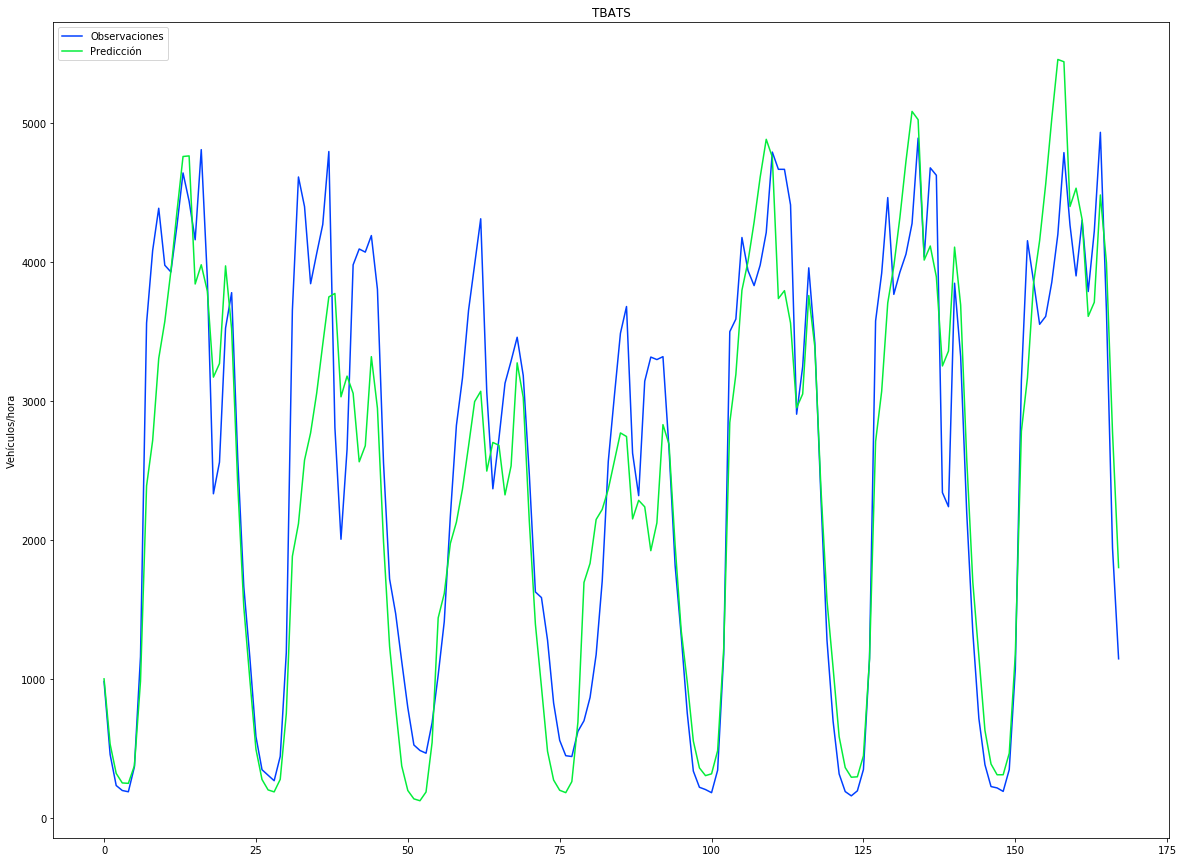

In [131]:
#Plot contra el dataset de test
f, ax = plt.subplots(figsize=(20,15))

ax.set_ylabel('Vehículos/hora')
ax.set_title('TBATS')
ax.plot(test.values,label = "Observaciones")
ax.plot(y_forecast, label = "Predicción")
#ax24_1.fill_between(pred_ci24_1.index,
#                pred_ci24_1.iloc[:, 0],
#                pred_ci24_1.iloc[:, 1], color='k', alpha=.2)
ax.legend()

## CART

In [132]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
plt.style.use('seaborn-bright')
from statsmodels.tsa.seasonal import STL,seasonal_decompose
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor 
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error as mse
from sklearn.utils import Bunch
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from sklearn import utils

In [137]:
tr=train.copy()
tr.index=tr.index.to_timestamp()

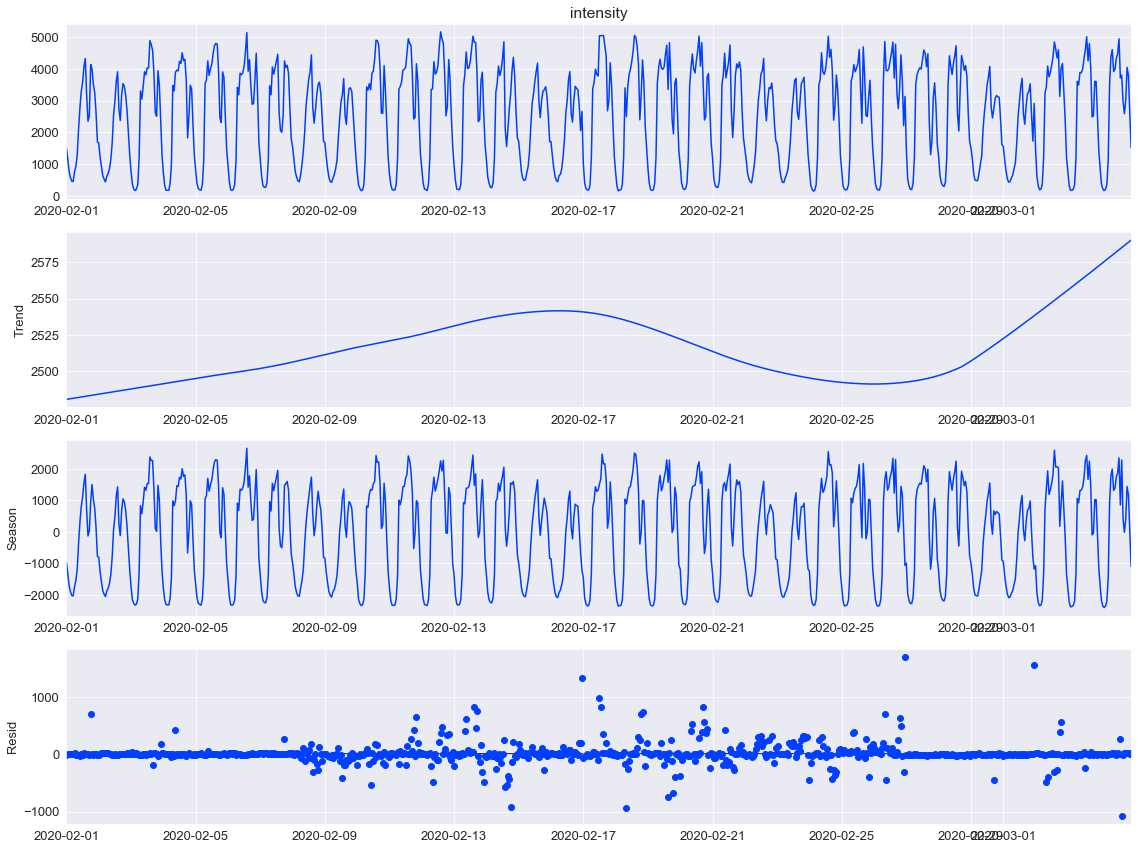

In [138]:
sns.set_style('darkgrid')
plt.rc('figure',figsize=(16,12))
plt.rc('font',size=13)
stl = STL(tr,period=168,robust=True)
res = stl.fit()
fig = res.plot()

In [140]:
N = train.count()

In [141]:
exog=pd.DataFrame({'timestamp':train.index})
exog = exog.set_index(pd.PeriodIndex(exog['timestamp'], freq='H'))
#exog=exog.drop('timestamp',axis=1)
i=0
for index,row in exog.iterrows():
    exog.at[index,'S1-24'] = np.sin(2 * np.pi * i / 24)
    exog.at[index,'S2-24'] = np.sin(4 * np.pi * i / 24)
    exog.at[index,'C1-24'] = np.cos(2 * np.pi * i / 24)
    exog.at[index,'C2-24'] = np.cos(4 * np.pi * i / 24)

    exog.at[index,'S1-168'] = np.sin(2 * np.pi * i / 168)
    exog.at[index,'S2-168'] = np.sin(4 * np.pi * i / 168)
    exog.at[index,'C1-168']= np.cos(2 * np.pi * i / 168)
    exog.at[index,'C2-168'] = np.cos(4 * np.pi * i / 168)
    i=i+1
exog = exog.drop(columns=['timestamp'])
exog=exog[24:]
S124 = exog.iloc[:,0]
S224 = exog.iloc[:,1]
C124 = exog.iloc[:,2]
C224 = exog.iloc[:,3]
S1168 = exog.iloc[:,4]
S2168 = exog.iloc[:,5]
C1168 = exog.iloc[:,6]
C2168 = exog.iloc[:,7]

In [142]:
new_intensity = tr-res.trend
new_intensity=new_intensity[24:N]
new_intensity =new_intensity.rename('intensity')
new_intensity.index.name='timestamp'
new_intensity.index=new_intensity.index.to_period('H')

In [143]:
lag_seas = res.seasonal.shift(24)[24:]
lag_seas =lag_seas.rename('seasonal_part')
lag_seas.index.name='timestamp'
lag_seas.index=lag_seas.index.to_period('H')

In [144]:
data_train = pd.concat([new_intensity,lag_seas,S124,S224,C124,C224,S1168,S2168,C1168,C2168], axis=1)
Y_train = data_train.iloc[:,0]
X_train = data_train.drop(['intensity'],axis=1)

In [145]:
Y_train = data_train.iloc[:,0]
X_train = data_train.drop(['intensity'],axis=1)

In [146]:
#Predicción de la tendencia en una semana
#Ajuste trend model
arima_trend_model= auto_arima(y=res.trend, seasonal=False)
#predicción de tendencia
y_arima_trend_pred = arima_trend_model.predict(n_periods=168)

In [147]:
sns.set_style('darkgrid')
plt.rc('figure',figsize=(16,12))
plt.rc('font',size=13)
stl_test = STL(test,period=168,robust=True)
res_test = stl_test.fit()

In [148]:
exog=pd.DataFrame({'timestamp':test.index})
exog = exog.set_index(pd.PeriodIndex(exog['timestamp'], freq='H'))
#exog=exog.drop('timestamp',axis=1)
i=0
for index,row in exog.iterrows():
    exog.at[index,'S1-24'] = np.sin(2 * np.pi * i / 24)
    exog.at[index,'S2-24'] = np.sin(4 * np.pi * i / 24)
    exog.at[index,'C1-24'] = np.cos(2 * np.pi * i / 24)
    exog.at[index,'C2-24'] = np.cos(4 * np.pi * i / 24)

    exog.at[index,'S1-168'] = np.sin(2 * np.pi * i / 168)
    exog.at[index,'S2-168'] = np.sin(4 * np.pi * i / 168)
    exog.at[index,'C1-168']= np.cos(2 * np.pi * i / 168)
    exog.at[index,'C2-168'] = np.cos(4 * np.pi * i / 168)
    i=i+1
exog = exog.drop(columns=['timestamp'])
exog=exog[24:]
S124 = exog.iloc[:,0]
S224 = exog.iloc[:,1]
C124 = exog.iloc[:,2]
C224 = exog.iloc[:,3]
S1168 = exog.iloc[:,4]
S2168 = exog.iloc[:,5]
C1168 = exog.iloc[:,6]
C2168 = exog.iloc[:,7]

In [150]:
test_lag = res_test.seasonal.shift(24)[24:]
test_lag =test_lag.rename('seasonal_part')
test_lag.index.name='timestamp'
#test_lag.index=test_lag.index.to_period('H')

In [151]:
X_test = pd.concat([test_lag,S124,S224,C124,C224,S1168,S2168,C1168,C2168], axis=1)

In [152]:
model_cart = DecisionTreeRegressor(max_depth=8)
rt = model_cart.fit(X_train,Y_train)

In [153]:
y_pred=[]
for index,row in X_train.iterrows():
    y_pred.append(model_cart.predict([row.values])[0])

In [154]:
Y_test_pred = model_cart.predict(X_test)+y_arima_trend_pred[24:]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


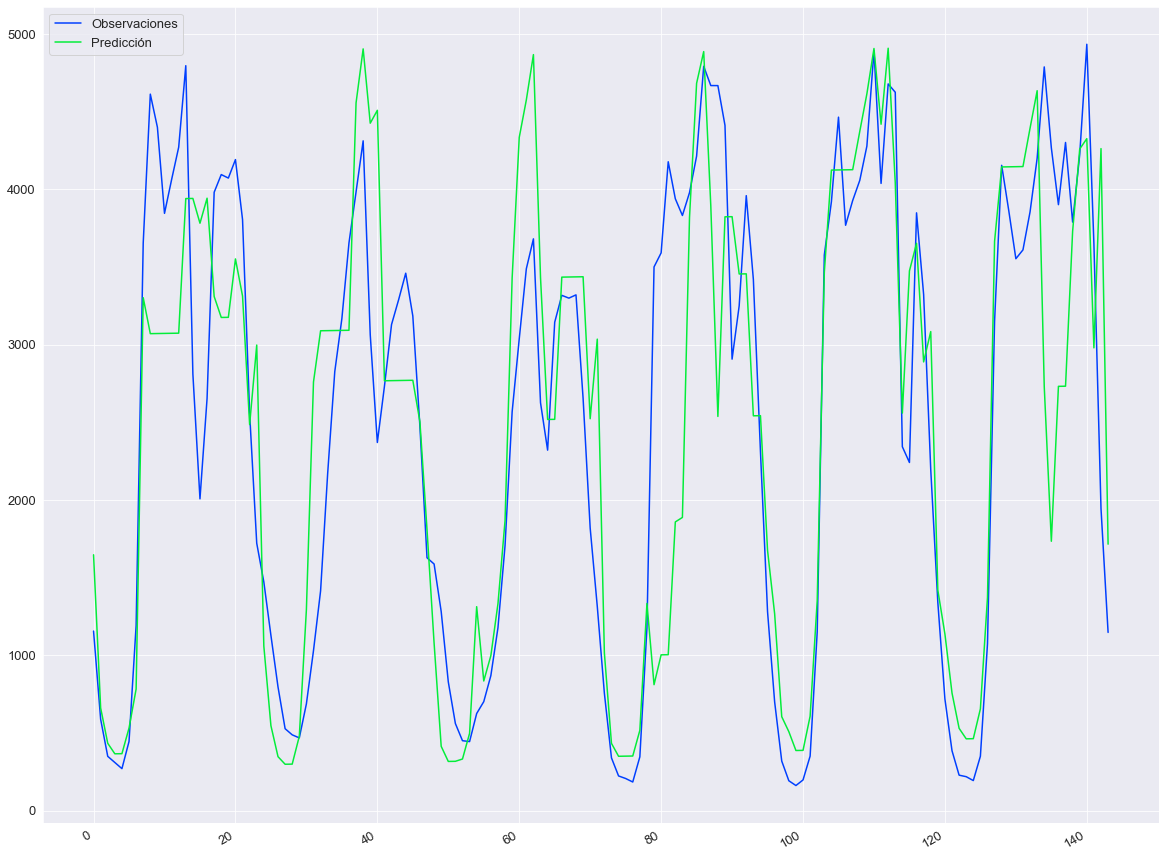

In [155]:
#Plot contra el dataset de test
f, ax = plt.subplots(figsize=(20,15))
ax.plot(test[24:].values,label = "Observaciones")
ax.plot(Y_test_pred, label = "Predicción")
ax.legend()

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
f.show()

In [248]:
mlr_pred= np.vstack(predictions)

## Comparacion

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


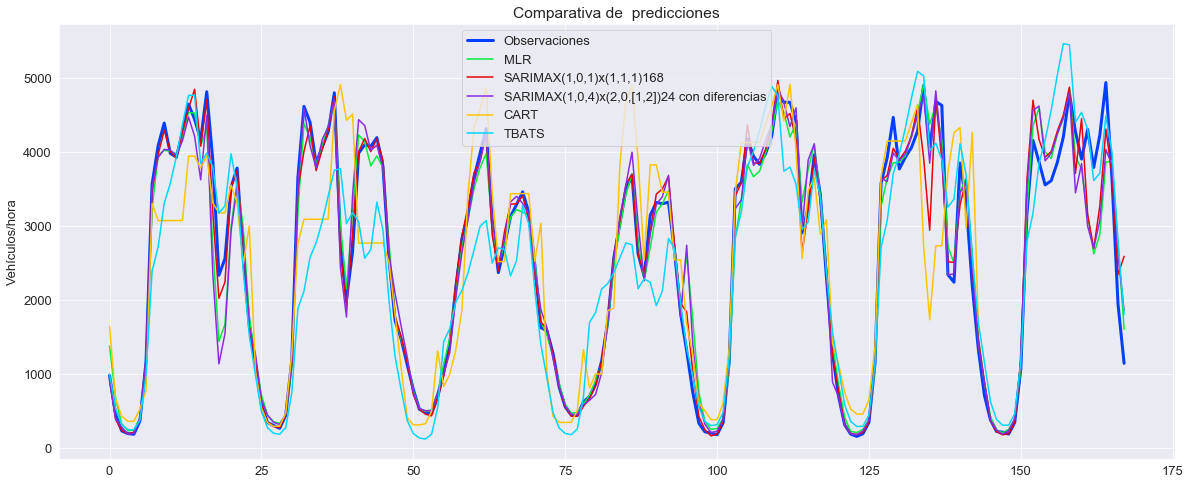

In [267]:
#Plot contra el dataset de test
f, ax1 = plt.subplots(figsize=(20,8))

ax1.set_ylabel('Vehículos/hora')
ax1.set_title('Comparativa de  predicciones')
ax1.plot(test.values,label = "Observaciones",linewidth=3, )
ax1.plot(mlr_pred, label = "MLR")
ax1.plot(pred.values, label = "SARIMAX(1,0,1)x(1,1,1)168")
ax1.plot(res_pred_24.values, label="SARIMAX(1,0,4)x(2,0,[1,2])24 con diferencias")
ax1.plot(Y_test_pred, label = "CART")
ax1.plot(y_forecast, label = "TBATS")

ax1.legend()


f.show()

In [254]:
len(Y_test_pred)

144

In [268]:
mse_mlr = mse(test,mlr_pred)
mse_sarima168= mse(test,pred.values)
mse_sarima24= mse(test,res_pred_24)
mse_cart= mse(test[24:],Y_test_pred)
mse_tbats= mse(test,y_forecast)
al_res = pd.DataFrame({"Algoritmos":['MLR', 'SARIMAX(1,0,1)x(1,1,1)168', 'SARIMAX(1,0,4)x(2,0,[1,2])24 con diferencias', 'CART','TBATS'], 
                    "mse":[mse_mlr, mse_sarima168, mse_sarima24, mse_cart,mse_tbats]}
                      )
al_res

,Algoritmos,mse
0,MLR,117265.149907
1,"SARIMAX(1,0,1)x(1,1,1)168",84635.141521
2,"SARIMAX(1,0,4)x(2,0,[1,2])24 con diferencias",124941.754370
3,CART,800073.202515
4,TBATS,433199.141846


Mejor predictor SARIMAX(1,0,1)x(1,1,1)168